In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv("homeprices.csv")
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [44]:
towndf = pd.get_dummies(df)
towndf.head()

,area,price,town_monroe township,town_robinsville,town_west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0


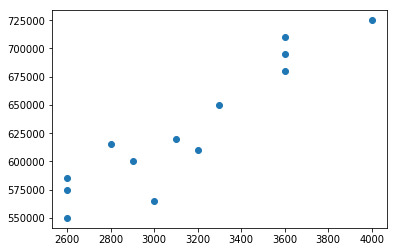

In [46]:
%matplotlib inline
plt.scatter(towndf[["area"]],towndf.price)

In [61]:
towndf=towndf.drop(["town_west windsor"],axis="columns")
towndf

,area,price,town_monroe township,town_robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [62]:
y = towndf.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [63]:
X= towndf.drop(["price"], axis ="columns")
X

,area,town_monroe township,town_robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
res = model.predict([[3600,1,0]])
res

array([666607.18125134])

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le = LabelEncoder()
le_df = df

In [81]:
le_df.town = le.fit_transform(le_df.town)
X =le_df[["town","area"]].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [85]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder(categorical_features=[0])
X = ohe.fit_transform(X).toarray()
X=X[:,1:]
model.fit(X,y)
p =model.predict([[0,0,2600]])
p

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([539709.7398409])